<a href="https://colab.research.google.com/github/atulya22/ML/blob/master/LessonOne/Image_Classification_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

from fastai import *
from fastai.vision import * 

path = untar_data(URLs.PETS)

PosixPath('/root/.fastai/data/oxford-iiit-pet/images')

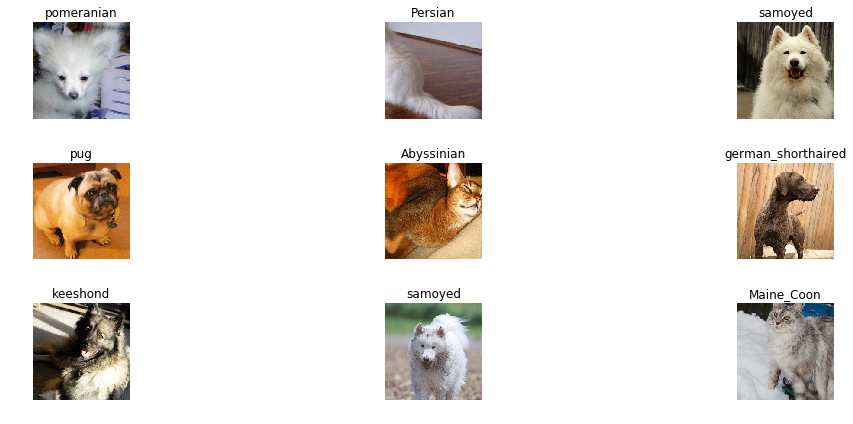

In [0]:
path_image = path/'images'
path_annot = path/'annotations'

fnames = get_image_files(path_image) # Get path for all image in data set
re_pattern = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(path_image, fnames, re_pattern, ds_tfms= get_transforms(), size=224)
data.normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(17,6))
path_image

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 28730755.84it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.408565,0.355625,0.110961,01:19
1,0.563226,0.262305,0.094723,01:18
2,0.357441,0.216046,0.068336,01:17
3,0.266857,0.210644,0.064276,01:17


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

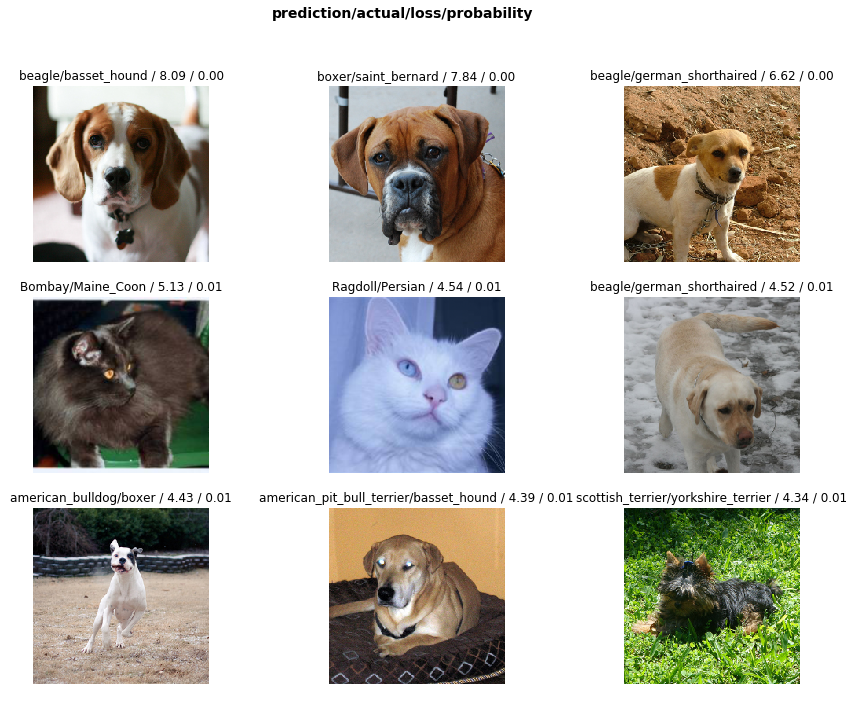

In [0]:
interp.plot_top_losses(9, figsize=(15,11))


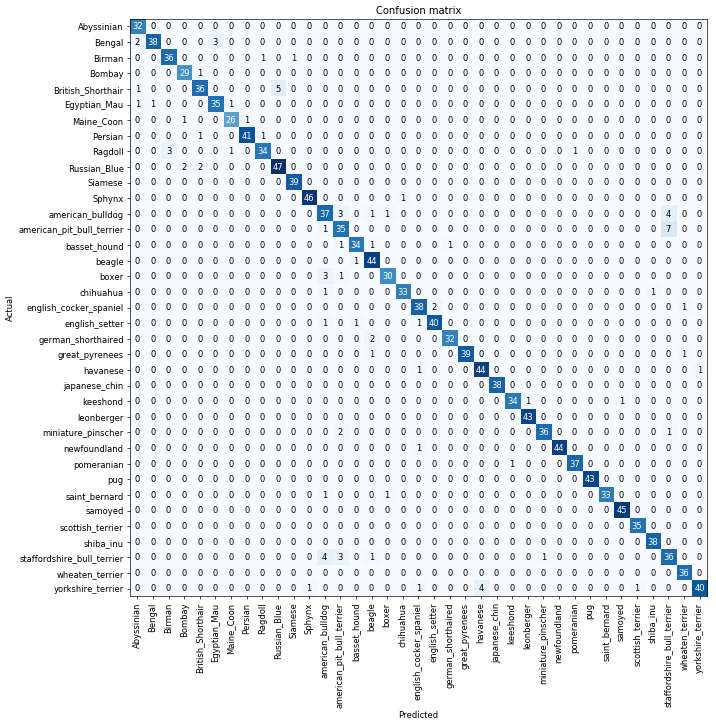

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [0]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('yorkshire_terrier', 'havanese', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Ragdoll', 'Birman', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('boxer', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('german_shorthaired', 'beagle', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2)]

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.357500,0.371507,0.106901,01:19


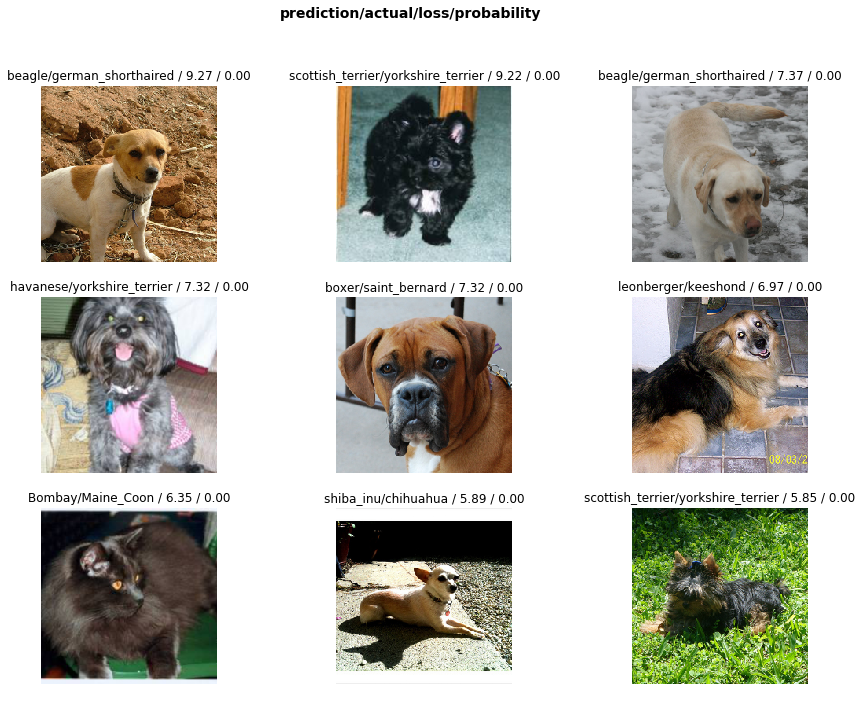

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))


In [0]:
interp.most_confused(min_val=2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('British_Shorthair', 'Russian_Blue', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Ragdoll', 'Birman', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('yorkshire_terrier', 'havanese', 3),
 ('yorkshire_terrier', 'scottish_terrier', 3),
 ('Birman', 'Siamese', 2),
 ('Egyptian_Mau', 'Abyssinian', 2),
 ('Persian', 'British_Shorthair', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'basset_hound', 2),
 ('beagle', 'saint_bernard', 2),
 ('boxer', 'american_pit_bull_terrier', 2),
 ('boxer', 'leonberger', 2),
 ('chihuahua', 'american_pit_bull_terrier', 2),
 ('chihuahua', 'shiba_inu', 2),
 ('english_setter', 'chihuahua', 2),
 ('german_shorthaired', 'beagle', 2),
 (

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


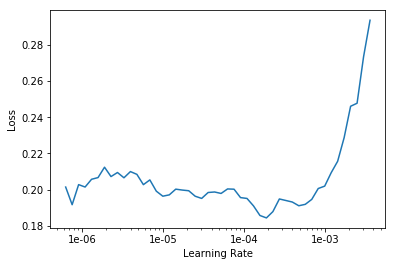

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.193197,0.317677,0.093369,01:20
1,0.161192,0.305024,0.087957,01:21


In [0]:
learn.load('stage-1')
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.240554,0.203241,0.060893,01:20
1,0.212426,0.196400,0.062246,01:20


In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.189081,0.193302,0.060217,01:20
1,0.180942,0.191704,0.060217,01:20
